In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [309]:
data_df = pd.read_csv('anime_after_preproc.csv')
data_df.head(5)
#Hiển thị 5 dòng đầu xem dữ liệu đọc đã đúng chưa
data_df.shape

(21460, 28)

In [161]:
def draw_bar_chart(data, title, xlabel, ylabel):
    plt.barh(data.keys(),data.values, height = 0.8)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [358]:
def split_str(s):
    result = s.split(',')
    for i in range(len(result)):
        result[i] = result[i].strip()
    return result

### Anime như thế nào thì dễ trở nên nổi tiếng (được nhiều người biết đến)?

Để trả lời cho câu hỏi trên, đầu tiên chúng ta cần lấy ra bộ dữ liệu gồm các anime nổi tiếng. Nhóm em quyết định nếu anime nằm trong 5% tương đương 1000 anime xếp theo `Popularity` trong bộ dữ liệu thì có thể được tính là anime nổi tiếng.

Ở câu hỏi này, chúng ta sẽ quan tâm đến 3 thông tin: (Bởi vì bộ dữ liệu cũng có 3 thông tin này dùng được cho câu hỏi)
- Anime về chủ đề gì? (Giá trị ở cột `Themes`)
- Anime thuộc thể loại nào? (Giá trị ở cột `Genres`)
- Anime hướng đến độ tuổi nào? (Giá trị ở cột `Rating`)

Hiển nhiên chúng ta có thể xét trên toàn bộ dữ liệu để tìm đặc điểm chung của tất cả anime, nếu mặc định các anime nổi tiếng sẽ nằm trong các đặc điểm chung đó, nhưng liệu nó có chắc sẽ đúng?

Việc chúng ta sẽ làm là tính số các anime thuộc các chủ đề (Thể loại, độ tuổi) khác nhau. Căn cứ vào các chủ đề (Thể loại, độ tuổi) chiếm tỉ lệ lớn, chúng ta sẽ rút ra được đặc điểm chung của các anime nổi tiếng.

Được rồi, chúng ta sẽ bắt đầu với thông tin liên quan đến chủ đề của các anime. Có thể xuất hiện một số các chủ đề anime có các tỉ lệ rất nhỏ, nếu bỏ đi cũng sẽ không ảnh hưởng đến kết quả

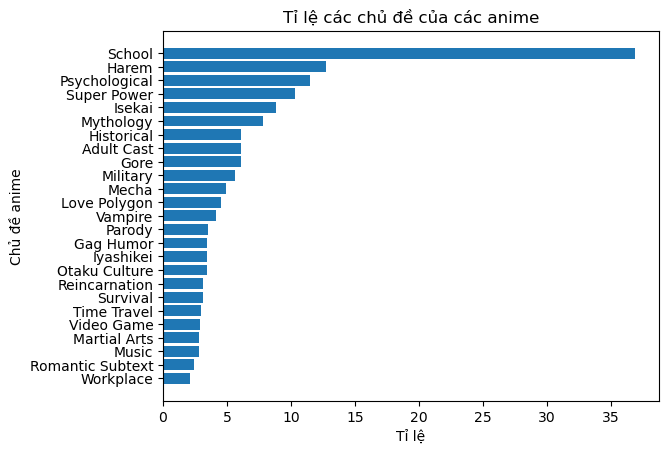

School              36.9
Harem               12.7
Psychological       11.5
Super Power         10.3
Isekai               8.8
Mythology            7.8
Historical           6.1
Adult Cast           6.1
Gore                 6.1
Military             5.6
Mecha                4.9
Love Polygon         4.5
Vampire              4.1
Parody               3.5
Gag Humor            3.4
Iyashikei            3.4
Otaku Culture        3.4
Reincarnation        3.1
Survival             3.1
Time Travel          3.0
Video Game           2.9
Martial Arts         2.8
Music                2.8
Romantic Subtext     2.4
Workplace            2.1
Name: Themes, dtype: float64

In [361]:
df = data_df[data_df['Popularity']<1000]
df = df[df['Themes']!='Unknown']
size = df.shape[0]
df['Themes'] = df['Themes'].apply(split_str)
df = df.explode('Themes')
data = (df['Themes'].value_counts() / size * 100).round(1)[:25]
draw_bar_chart(data.sort_values(), 'Tỉ lệ các chủ đề của các anime nổi tiếng', 'Tỉ lệ', 'Chủ đề anime')
data

Ở thông tin liên quan đến chủ đề đã bắt đầu xuất hiện các chủ đề có số anime mang tính "áp đảo" so với các chủ đề khác. Đây là điều tốt trong việc xác định đặc điểm chung cho các anime nổi tiếng. Hơn nữa, qua đây chúng ta đã thấy rất rõ các đặc điểm điểm chung của tất cả anime không giống với đặc điểm của anime với anime nổi tiếng!! Ở bước khám phá dữ liệu chúng ta đã biết tỉ lệ của mỗi giá trị trong mỗi cột. 

Tiếp đến là thông tin liên quan đến thể loại anime.

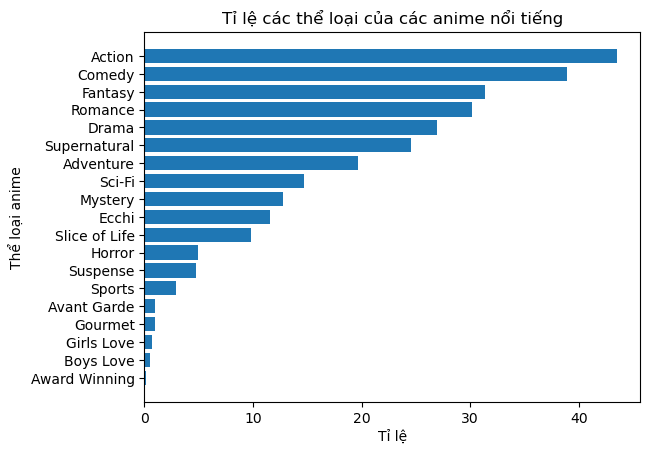

Action           43.5
Comedy           38.9
Fantasy          31.4
Romance          30.2
Drama            26.9
Supernatural     24.5
Adventure        19.7
Sci-Fi           14.7
Mystery          12.8
Ecchi            11.6
Slice of Life     9.8
Horror            4.9
Suspense          4.7
Sports            2.9
Avant Garde       1.0
Gourmet           1.0
Girls Love        0.7
Boys Love         0.5
Award Winning     0.1
Name: Genres, dtype: float64

In [362]:
df = data_df[data_df['Popularity']<1000]
df = df[df['Genres']!='Unknown']
size = df.shape[0]
df['Genres'] = df['Genres'].apply(split_str)
df = df.explode('Genres')
data = (df['Genres'].value_counts() / size * 100).round(1)
draw_bar_chart(data.sort_values(), 'Tỉ lệ các thể loại của các anime nổi tiếng', 'Tỉ lệ', 'Thể loại anime')
data

Ở thông tin liên quan đến thể loại,chúng ta tiếp tục thấy sự chênh lệch rõ ràng giữa 2 nhóm: 1 nhóm chiếm tỉ lệ lớn và nhóm còn lại chiếm tỉ lệ rất nhỏ.

Cuối cùng là thông tin liên quan đến độ tuổi phù hợp xem anime.

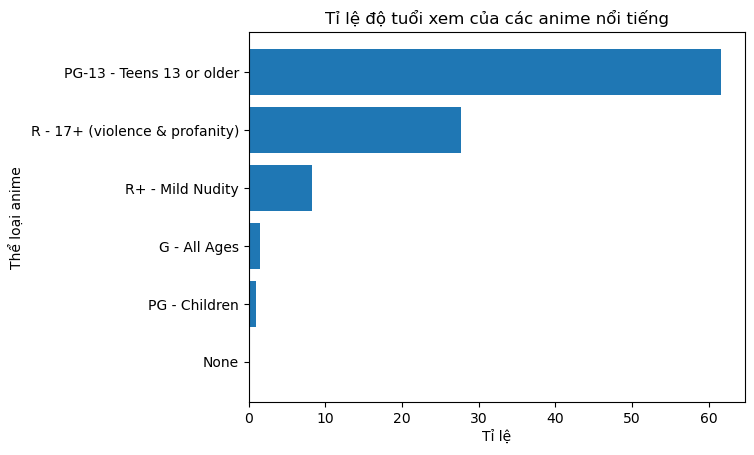

PG-13 - Teens 13 or older         61.6
R - 17+ (violence & profanity)    27.7
R+ - Mild Nudity                   8.2
G - All Ages                       1.5
PG - Children                      0.9
None                               0.1
Name: Rating, dtype: float64

In [363]:
df = data_df[data_df['Popularity']<1000]
size = df.shape[0]
data = (df['Rating'].value_counts() / size * 100).round(1)
draw_bar_chart(data.sort_values(), 'Tỉ lệ độ tuổi xem của các anime nổi tiếng', 'Tỉ lệ', 'Thể loại anime')
data

**Nhận xét:**
- Các anime nổi tiếng đa số có một số đặc điểm như liên quan đến trường học (có lẽ là do độ tuổi xem phim đa số là tuổi đi học?), nam chính và dàn Harem cực phẩm, hay là các bộ phim chuyển sinh đến thế giới khác với nhiều sức mạnh cấp SSS, đi đập nhau auto win.
- Cũng có thể là các bộ phim tâm lý, tình cảm nhưng đa số đều có các yếu tố hài hước, lãng mạn và rất nhiều thứ Fantasy.

In [351]:
df = data_df[data_df['Popularity']>1000]
df = df[df['Genres']!='Unknown']
size = df.shape[0]
df['Genres'] = df['Genres'].apply(split_str)
df = df.explode('Genres')
(df['Genres'].value_counts() / size * 100).round(1)

Comedy           37.5
Action           23.3
Fantasy          23.3
Adventure        19.4
Sci-Fi           16.2
Drama            14.9
Slice of Life    11.2
Romance          10.1
Hentai            8.7
Supernatural      7.9
Sports            4.1
Ecchi             4.0
Mystery           3.9
Avant Garde       3.7
Horror            2.7
Boys Love         0.9
Suspense          0.8
Gourmet           0.6
Girls Love        0.6
Erotica           0.3
Award Winning     0.1
Name: Genres, dtype: float64

In [353]:
df = data_df[data_df['Popularity']<1000]
df['Type'].value_counts()

TV         831
Movie      112
OVA         26
Special     16
ONA         13
Music        1
Name: Type, dtype: int64